In [18]:
#package for data analysis and management
import pandas as pd
#package for numerical computations
import numpy as np

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#to split the data into train and test data set
from sklearn.model_selection import train_test_split
#Linear Regression Model
from sklearn.linear_model import LinearRegression
#Evaluation metric for regression model
from sklearn.metrics import mean_squared_error

Loading the data and sorting the values by id after merging

In [2]:
test = pd.read_csv("cancer_us_county-testing.csv")
train = pd.read_csv("cancer_us_county-training.csv")

df = pd.concat([test, train])
df = df.sort_values(by="Id")

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Handling the missing values

In [4]:
df.drop("PctSomeCol18_24", axis=1, inplace=True)

mean_value = df['PctEmployed16_Over'].mean()
df['PctEmployed16_Over'].fillna(mean_value, inplace=True)
print(df['PctEmployed16_Over'])

mean_value = df['PctPrivateCoverageAlone'].mean()
df['PctPrivateCoverageAlone'].fillna(mean_value, inplace=True)
print(df['PctPrivateCoverageAlone'])

0       37.3
1       31.7
2       48.5
3       57.1
4       28.6
        ... 
2434    52.3
2435    46.5
272     36.1
2436    56.2
2437    51.4
Name: PctEmployed16_Over, Length: 3047, dtype: float64
0       33.6
1       20.7
2       49.6
3       56.8
4       37.8
        ... 
2434    51.5
2435    43.4
272     54.5
2436    43.4
2437    43.0
Name: PctPrivateCoverageAlone, Length: 3047, dtype: float64


In [20]:
missing_values = df.isnull().sum()
print(missing_values)

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64


<AxesSubplot:>

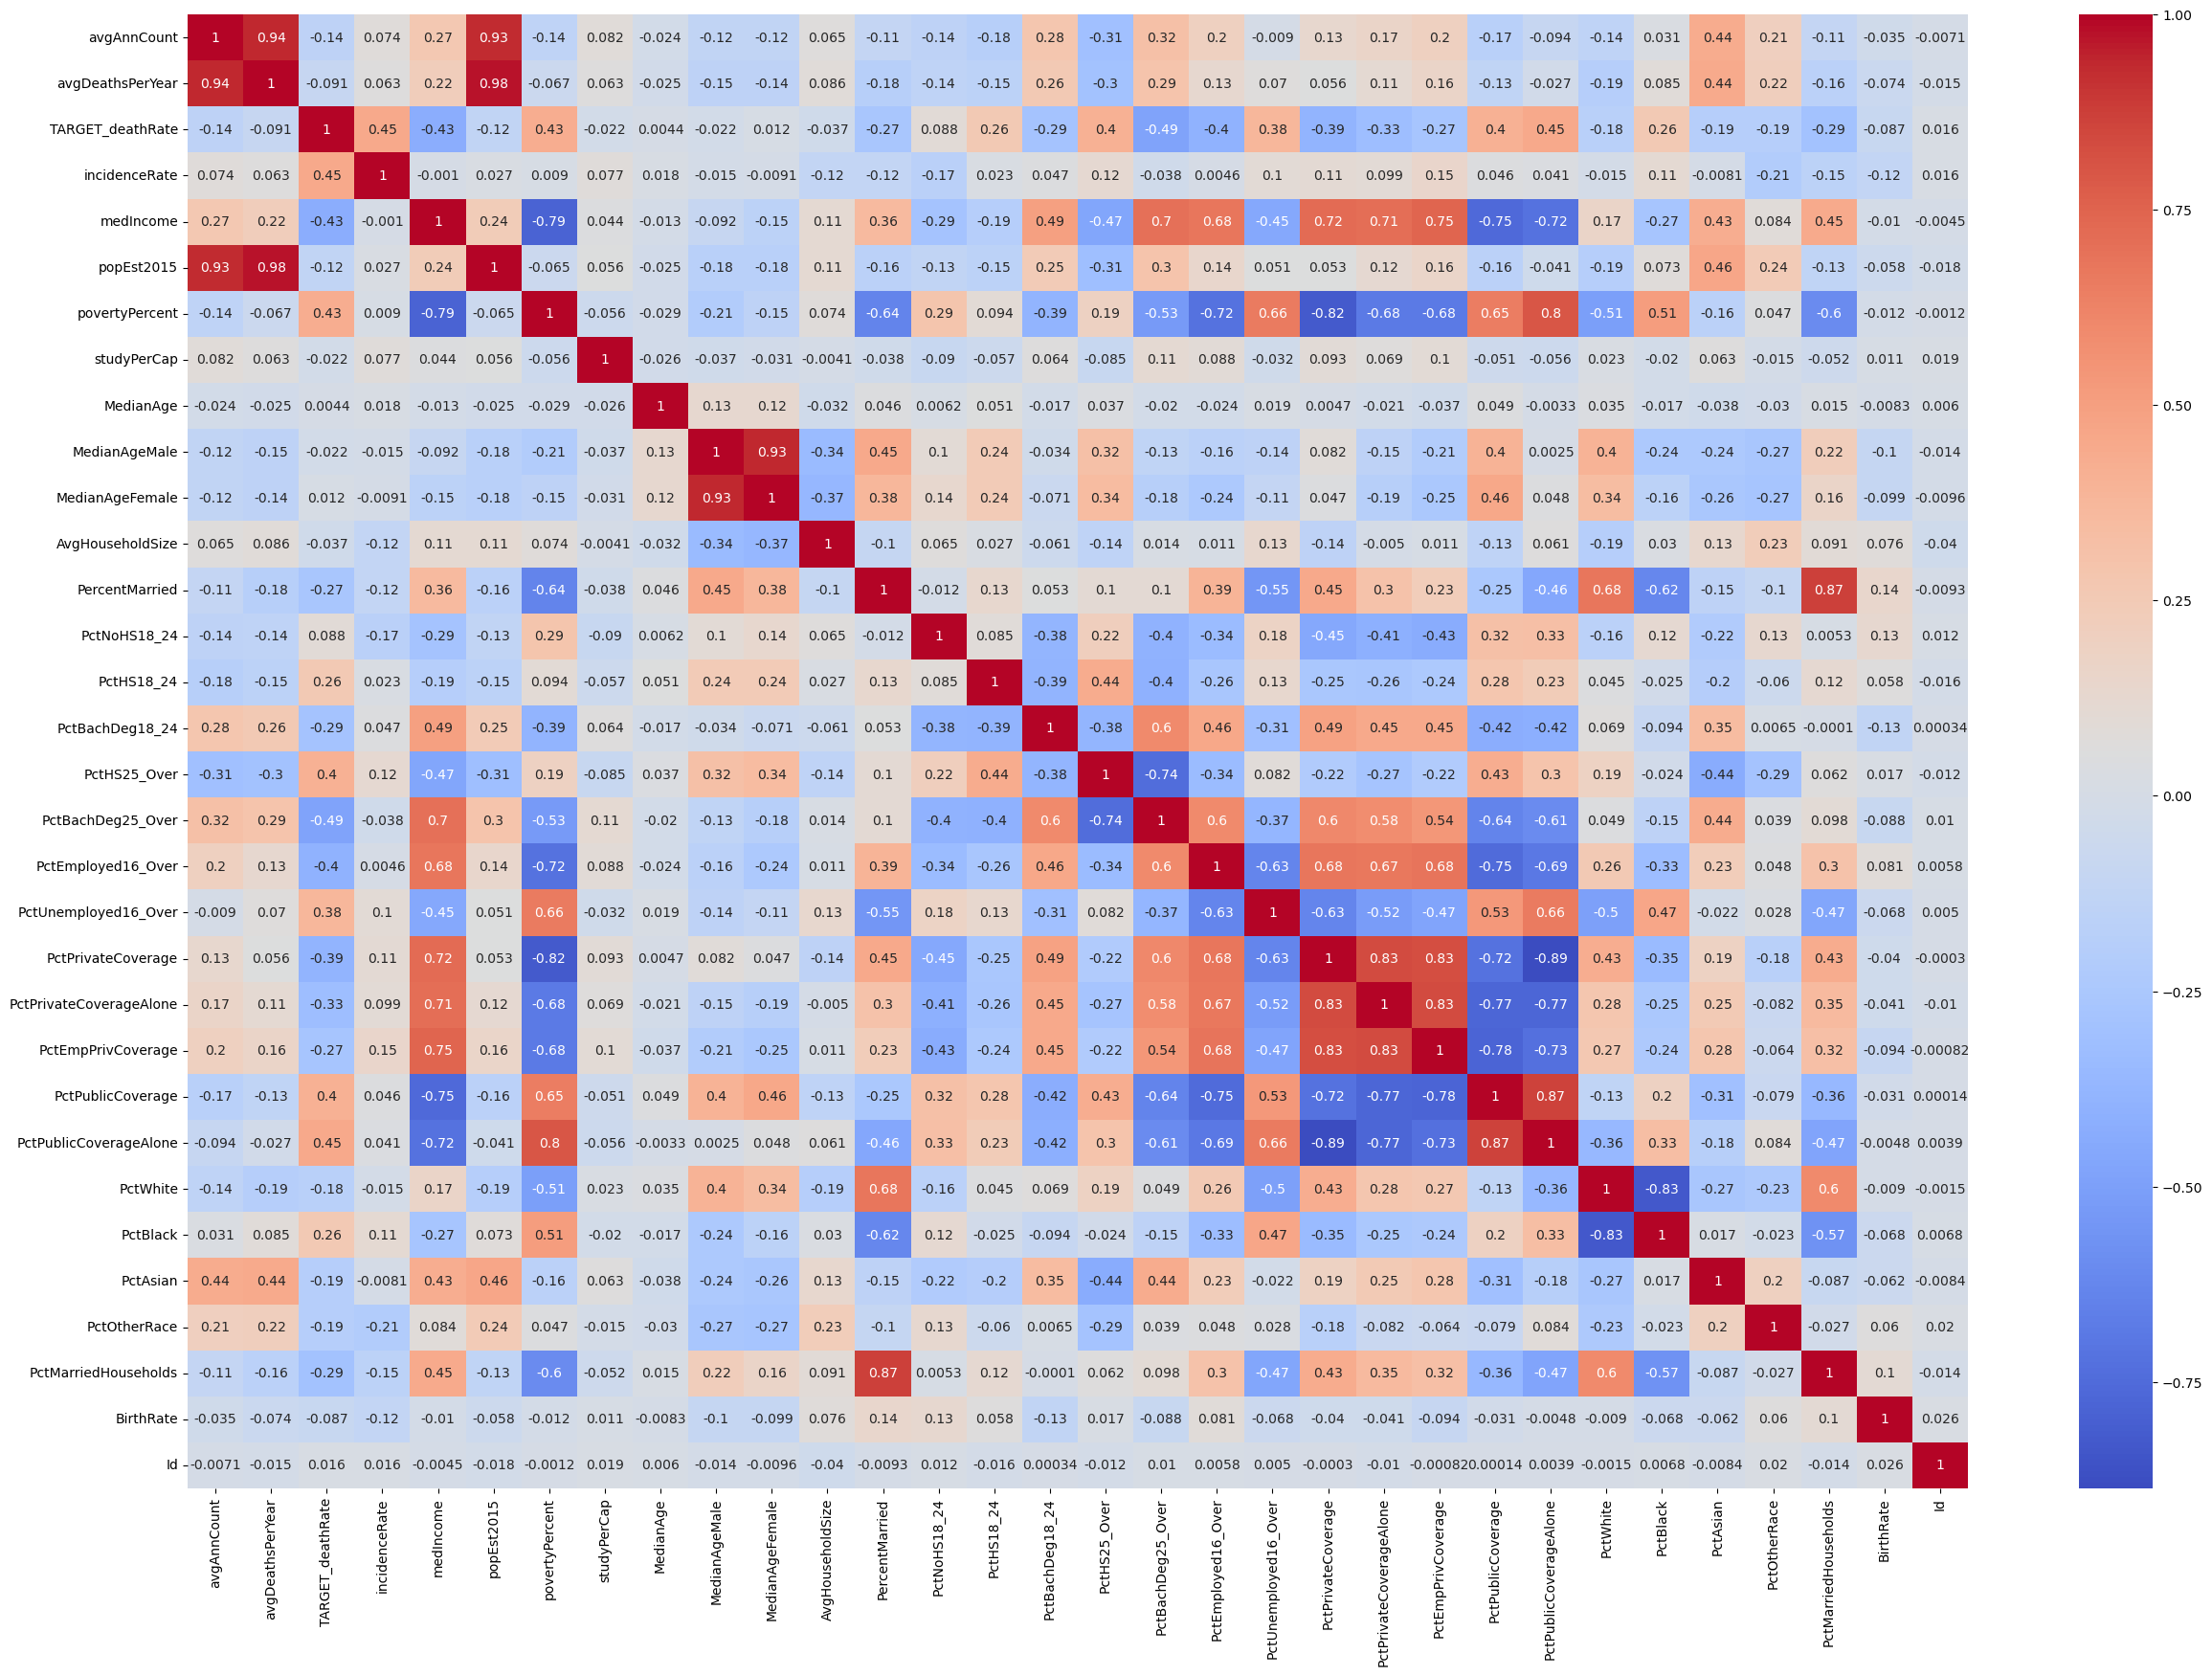

In [19]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [22]:
np.abs(corr['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.485477
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
medIncome                  0.428615
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctEmployed16_Over         0.397487
PctPrivateCoverage         0.386066
PctUnemployed16_Over       0.378412
PctPrivateCoverageAlone    0.326067
PctMarriedHouseholds       0.293325
PctBachDeg18_24            0.287817
PctEmpPrivCoverage         0.267399
PercentMarried             0.266820
PctHS18_24                 0.261976
PctBlack                   0.257024
PctOtherRace               0.189894
PctAsian                   0.186331
PctWhite                   0.177400
avgAnnCount                0.143532
popEst2015                 0.120073
avgDeathsPerYear           0.090715
PctNoHS18_24               0.088463
BirthRate                  0.087407
AvgHouseholdSize           0.036905
studyPerCap                0

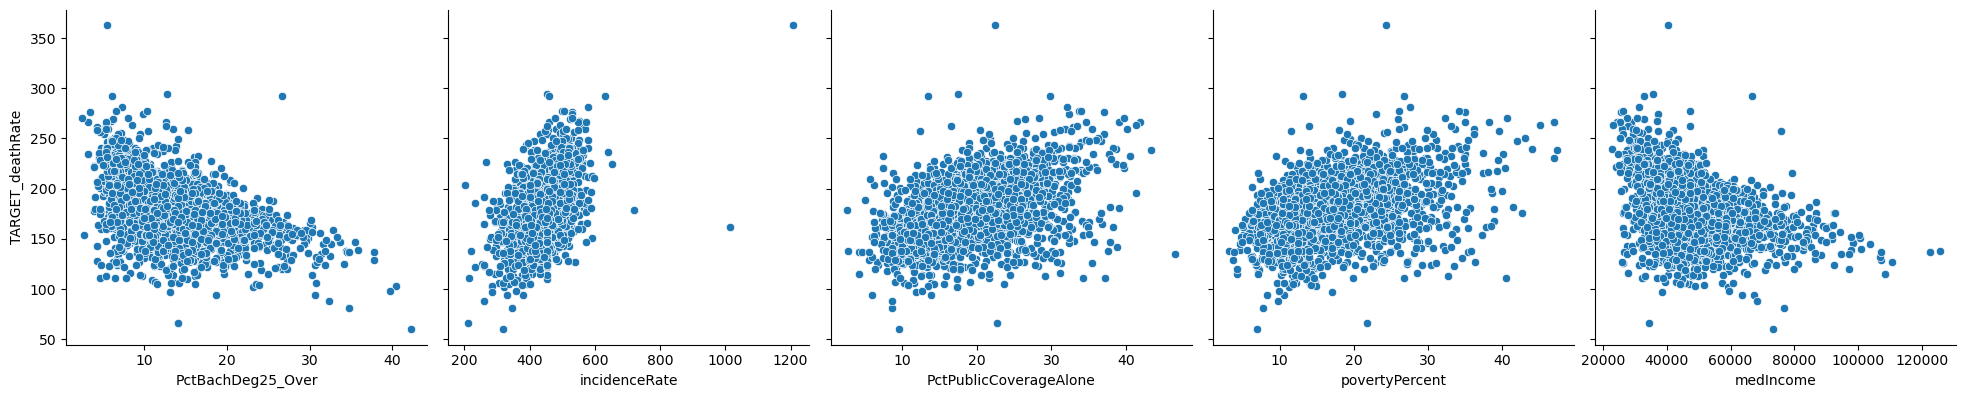

In [23]:
sns.pairplot(df, x_vars=['PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone' ,'povertyPercent','medIncome'], y_vars='TARGET_deathRate', height=4, aspect=1, kind='scatter')
plt.show()

In [29]:
# Select two features to use for univariate linear regression
feature_1 = "incidenceRate"
feature_2 = "povertyPercent"

# Split the dataset into the selected features and target variable
X = df[[feature_1, feature_2]]
y = df["TARGET_deathRate"]

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train the model for feature 1
model_1 = LinearRegression()
model_1.fit(X_train[[feature_1]], y_train)

# Predict target variable for testing set using feature 1 model
y_pred_1 = model_1.predict(X_test[[feature_1]])

# Calculate the MSE for the predictions using feature 1 model
mse_1 = mean_squared_error(y_test, y_pred_1)
print("Mean Squared Error for", feature_1, ":", mse_1)

Mean Squared Error for incidenceRate : 647.9222096422068


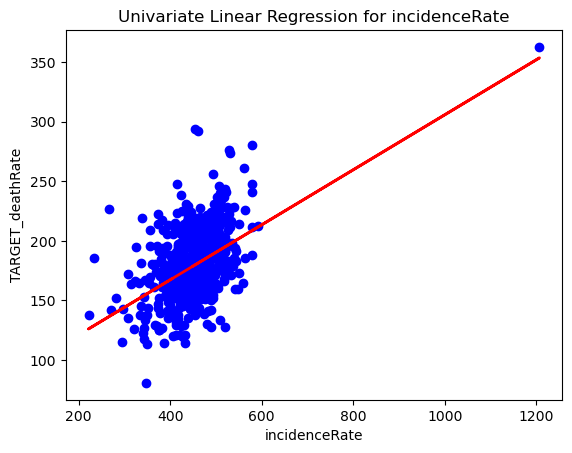

In [32]:
# plot the results
plt.scatter(X_test[[feature_1]], y_test, color='blue')
plt.plot(X_test[[feature_1]], y_pred_1, color='red', linewidth=2)
plt.title("Univariate Linear Regression for " + feature_1)
plt.xlabel(feature_1)
plt.ylabel("TARGET_deathRate")
plt.show()

In [33]:
# Create and train the model for feature 2
model_2 = LinearRegression()
model_2.fit(X_train[[feature_2]], y_train)

# Predict target variable for testing set using feature 2 model
y_pred_2 = model_2.predict(X_test[[feature_2]])

# Calculate the MSE for the predictions using feature 2 model
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error for", feature_2, ":", mse_2)

Mean Squared Error for povertyPercent : 708.850054432015


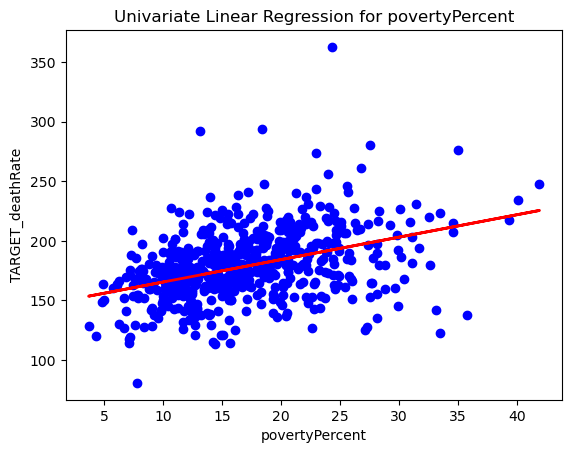

In [34]:
plt.scatter(X_test[[feature_2]], y_test, color='blue')
plt.plot(X_test[[feature_2]], y_pred_2, color='red', linewidth=2)
plt.title("Univariate Linear Regression for " + feature_2)
plt.xlabel(feature_2)
plt.ylabel("TARGET_deathRate")
plt.show()